In [262]:
import autograd.numpy as np
import autograd
import pandas as pd
from autograd import grad
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Q2

In [143]:
def normalEquationRidgeRegression(X, y, lam):
    (N,d)=np.shape(X)
    bias=np.array([1]*N)
    temp=np.zeros((N,d+1))
    temp[:,0]=bias
    temp[:,1:]=X
    X=np.matrix(temp)
    I=np.matrix(np.eye(d+1))
    I[0,0]=0
    if abs(np.linalg.det(X.T*X-lam*I))==0 :
        theta=np.linalg.pinv(X.T*X-lam*I)*X.T*y
    else:
        theta=np.linalg.inv(X.T*X-lam*I)*X.T*y
    return theta

def coordinateDescentRegression(X, y):
    (N,d)=np.shape(X)
    theta=np.matrix(np.zeros((d+1,1)))
    grad=np.ones((d+1,1))
    bias=np.array([1]*N)
    temp=np.zeros((N,d+1))
    temp[:,0]=bias
    temp[:,1:]=X
    X=np.matrix(temp)
#     X=preprocessing.normalize(X,axis=0)
    
    for i in range(10000):
#         ind=np.random.randint(d+1)
        ind=(i+1)%2
        norm_sq=np.linalg.norm(X[:,ind])**2
        grad=X.T*(y-(X*theta))
        rho=grad[ind,0]+(theta[ind,0]*norm_sq)
        theta[ind,0]=rho/norm_sq
        
    return theta

def coordinateDescentLasso(X, y, lam):
    (N,d)=np.shape(X)
    theta=np.matrix(np.zeros((d+1,1)))
    grad=np.ones((d+1,1))
    bias=np.array([1]*N)
    temp=np.zeros((N,d+1))
    temp[:,0]=bias
    temp[:,1:]=X
    X=np.matrix(temp)
#     X=preprocessing.normalize(X,axis=0)
    
    for i in range(10000):
        ind=np.random.randint(d+1)
        ind=i%(d+1)
        norm_sq=np.linalg.norm(X[:,ind])**2
        grad=X.T*(y-(X*theta))
        rho=grad[ind,0]+theta[ind,0]*norm_sq
        
        if rho>lam/2:
            theta[ind,0]=(rho-(lam/2))/norm_sq
        elif(rho<-lam/2):
            theta[ind,0]=(rho+(lam/2))/norm_sq
        else:
            theta[ind,0]=0
    return theta

def sgdRegression(X, y, alpha = 0.1):
    (N,d)=np.shape(X)
    theta=np.zeros((d+1,1))
    grad=np.zeros((d+1,1))
    bias=np.array([1]*N)
    temp=np.zeros((N,d+1))
    temp[:,0]=bias
    temp[:,1:]=X
    X=np.matrix(temp)
    
    for i in range(10000):
        full_data=np.matrix(np.concatenate((X,y),axis=1))
        f_r=X[np.random.choice(X.shape[0], size=1, replace=False), :]
        X_r=full_data[:,:-1]
        y_r=full_data[:,-1]
        grad=-2*X_r.T*(y_r-(X_r*theta))/N
        theta=theta-alpha*grad
    return theta



def gradientDescentAutogradLasso(X, y, lam, alpha = 0.1):
    (N,d)=np.shape(X)
    theta=np.zeros((d+1,1))
    bias=np.array([1]*N)
    temp=np.zeros((N,d+1))
    temp[:,0]=bias
    temp[:,1:]=X
    X=np.matrix(temp)
    
    def cost(theta):
        X_n=np.array(X)
        y_n=np.array(y)
        return (sum((y_n-np.matmul(X_n,theta))**2)/N)+lam*np.linalg.norm([x for x in theta],1)/N
    
    for i in range(1000):
        grad_cost=autograd.elementwise_grad(cost)
        theta=theta-alpha*grad_cost(np.array(theta))
    return theta


In [144]:
X=np.matrix('1;3;6')
y=np.matrix('6;10;16')
print('Normal Equation Ridge Regression: \n', normalEquationRidgeRegression(X,y,1))
print('Coordinate Descent w/o Regularization: \n', coordinateDescentRegression(X,y))
print('Coordinate Descent w/ Regularization: \n', coordinateDescentLasso(X,y,1))
print('Stochastic Gradient Descent: \n', sgdRegression(X,y,0.01))
print('Autograd LASSO: \n',gradientDescentAutogradLasso(X,y,1,0.01))

Normal Equation Ridge Regression: 
 [[3.42857143]
 [2.17142857]]
Coordinate Descent w/o Regularization: 
 [[4.]
 [2.]]
Coordinate Descent w/ Regularization: 
 [[3.52631579]
 [2.09210526]]
Stochastic Gradient Descent: 
 [[4.]
 [2.]]
Autograd LASSO: 
 [[3.51128229]
 [2.09543039]]


# Q3

In [135]:
X=np.matrix('1;3;6')
y=np.matrix('6;10;16')
alpha=0.1

(N,d)=np.shape(X)
theta=np.zeros((d+1,1))
grad=np.zeros((d+1,1))
bias=np.array([1]*N)
temp=np.zeros((N,d+1))
temp[:,0]=bias
temp[:,1:]=X
X=np.matrix(temp)

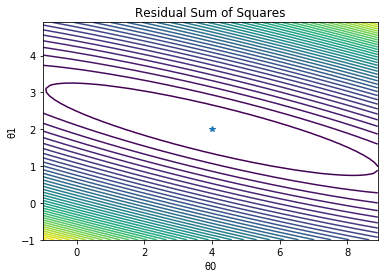

In [136]:
import matplotlib.pyplot as plt
import unicodedata

plt.gcf().clear()
tx=np.array(np.arange(-1,9,0.1))
ty=np.array(np.arange(-1,5,0.1))

t1,t2=np.meshgrid(tx,ty,sparse=True)
t1=t1.T
t2=t2
rss=np.zeros((len(t2),len(t1)))

for i in range(len(t1)):
    for j in range(len(t2)):
        theta=np.array([t1[i],t2[j]])
        rss[j,i]=np.sum(np.square((y-(np.matmul(X,theta)))))
tx,ty=np.meshgrid(tx,ty)
# print(np.shape(tx),np.shape(ty),np.shape(rss))
plt.contour(tx,ty,rss,50)
plt.plot(4,2,'*')
plt.title('Residual Sum of Squares')
plt.xlabel(unicodedata.lookup("GREEK SMALL LETTER THETA")+'0')
plt.ylabel(unicodedata.lookup("GREEK SMALL LETTER THETA")+'1')
plt.show()

In [71]:
tsf=X[np.random.choice(X.shape[0], size=1, replace=False), :]
np.shape(tsf)

(1, 2)

In [87]:
tsf=np.matrix(np.concatenate((X,y),axis=1))
tsf[:,-1]

matrix([[ 6.],
        [10.],
        [16.]])

In [137]:
import unicodedata

x_reg=np.linspace(0,8,20)
ar_x=[]
ar_y=[]

theta=np.zeros((2,1))
rs=0
alpha=0.01
plt.gcf().clear()
for i in range(79):
    if i==0:
        tp=np.array([[np.array(theta[0][0]),np.array(theta[1][0])]]).T
    else:
        tp=tn
        
    full_data=np.matrix(np.concatenate((X,y),axis=1))
    f_r=X[np.random.choice(X.shape[0], size=1, replace=False), :]
    X_r=full_data[:,:-1]
    y_r=full_data[:,-1]
    
    grad=-2*X_r.T*(y_r-(X_r*theta))/N
    theta=theta-alpha*grad
    tn=np.array([np.array(theta[0][0])[0],np.array(theta[1][0])[0]])
    rs=np.sum(np.square((y-(np.matmul(X,theta)))))
    xp=tp[0][0]
    yp=tp[1][0]
    dx=tn[0][0]-tp[0][0]
    dy=tn[1][0]-tp[1][0]
    
    plt.subplot(1,2,1)
    plt.cla()
    ar_x.append(xp)
    ar_y.append(yp)
    plt.contour(tx,ty,rss,30)
    plt.plot(4,2,'*')
    plt.plot(ar_x,ar_y)
    plt.title('Iteration '+str(i+1))
    plt.xlabel(unicodedata.lookup("GREEK SMALL LETTER THETA")+'0')
    plt.ylabel(unicodedata.lookup("GREEK SMALL LETTER THETA")+'1')
    plt.arrow(xp,yp,dx,dy,color='red',head_width=0.2)
    
    plt.subplot(1,2,2)
    plt.cla()
    plt.plot([1,3,6],[6,10,16],'^')
    y_reg=xp+yp*x_reg
    plt.plot(x_reg,y_reg,'-')
    plt.title('RSS = '+str(rs))
    plt.xlim(0,8)
    plt.ylim(0,20)
    
    filename=str(format(i+1, '03d'))+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()

! convert -delay 10 *.png Q3a.gif

/Users/girish/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [138]:
from IPython.display import Image
Image(url='Q3a.gif')  

In [139]:
import unicodedata

X=np.matrix('1;3;6')
y=np.matrix('6;10;16')
alpha=0.1

(N,d)=np.shape(X)
theta=np.zeros((d+1,1))
grad=np.zeros((d+1,1))
bias=np.array([1]*N)
temp=np.zeros((N,d+1))
temp[:,0]=bias
temp[:,1:]=X
X=np.matrix(temp)

tx=np.array(np.arange(-1,9,0.1))
ty=np.array(np.arange(-1,5,0.1))

t1,t2=np.meshgrid(tx,ty,sparse=True)
t1=t1.T
t2=t2
rss=np.zeros((len(t2),len(t1)))

for i in range(len(t1)):
    for j in range(len(t2)):
        theta=np.array([t1[i],t2[j]])
        rss[j,i]=np.sum(np.square((y-(np.matmul(X,theta)))))
tx,ty=np.meshgrid(tx,ty)

x_reg=np.linspace(0,8,20)
ar_x=[]
ar_y=[]

theta=np.zeros((2,1))
rs=0

plt.gcf().clear()
# X=np.matrix(preprocessing.normalize(X, axis=0))

for i in range(39):
    if i==0:
        tp=np.array([np.array(theta[0,0]),np.array(theta[1,0])]).T
    else:
        tp=tn
        
#     ind=np.random.randint(2)
    ind=(i+1)%2
    norm_sq=np.linalg.norm(X[:,ind])**2
    grad=X.T*(y-(X*theta))
#     +theta[ind,0]*X[:,ind]
    rho=grad[ind,0]+theta[ind,0]*norm_sq
#     norm=np.linalg.norm(X[:,ind])
    theta[ind,0]=rho/norm_sq
    
    tn=np.array([np.array(theta[0][0]),np.array(theta[1][0])])
    rs=np.sum(np.square((y-(np.matmul(X,theta)))))
    xp=tp[0]
    yp=tp[1]
    dx=tn[0]-tp[0]
    dy=tn[1]-tp[1]
    
    plt.subplot(1,2,1)
    plt.cla()
    ar_x.append(xp)
    ar_y.append(yp)
    plt.contour(tx,ty,rss,30)
    plt.plot(4,2,'*')
    plt.plot(ar_x,ar_y)
    plt.title('Iteration '+str(i+1))
    plt.xlabel(unicodedata.lookup("GREEK SMALL LETTER THETA")+'0')
    plt.ylabel(unicodedata.lookup("GREEK SMALL LETTER THETA")+'1')
    plt.arrow(xp,yp,dx,dy,color='red',head_width=0.2)
    
    plt.subplot(1,2,2)
    plt.cla()
    plt.plot([1,3,6],[6,10,16],'^')
    y_reg=xp+yp*x_reg
    plt.plot(x_reg,y_reg,'-')
    plt.title('RSS = '+str(rs))
    plt.xlim(0,8)
    plt.ylim(0,20)
    
    filename=str(format(i+1, '03d'))+'.jpg'
    plt.savefig(filename, dpi=96)
    plt.gca()

! convert -delay 10 *.jpg Q3b.gif

/Users/girish/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [140]:
from IPython.display import Image
Image(url='Q3b.gif')  

# Q4(a)

In [63]:
X=np.matrix('[1,2];[2,4];[3,6];[4,8]')
y=np.matrix('2;3;4;5')

In [15]:
reg=Ridge(alpha=1)
reg.fit(X,y)
theta=np.array([0.0]*(np.shape(X)[1]+1))
theta[1:]=reg.coef_[0]
theta[0]=reg.intercept_
theta

array([1.09615385, 0.19230769, 0.38461538])

# Q4(b)

In [64]:
normalEquationRidgeRegression(X,y,1)

matrix([[0.89583333],
        [0.20833333],
        [0.41666667]])

# Q5

In [253]:
fp = 'Real estate valuation data set.xlsx'
reg_data=pd.read_excel(fp)
reg_data=reg_data[reg_data.columns[1:]]

reg_data[reg_data.columns[:-1]]=preprocessing.normalize(reg_data[reg_data.columns[:-1]], norm='l2',axis=0, copy=False)

Y=reg_data[reg_data.columns[-1]]

# Q5(a)

In [235]:
def k_fold(data,k):
    shuffle=data.sample(frac=1).reset_index(drop=1)
    i=int(len(shuffle)/k)
    cvs=np.array([None]*k)
    for j in range(k):
        cvs[j]=shuffle[i*j:i*(j+1)]
    return cvs

In [258]:
from IPython.display import clear_output

cvs=k_fold(reg_data,5)
k=len(cvs)
va={}
x=np.array(range(k))

for i in range(k):
    [train,val,test]=[pd.DataFrame(np.concatenate(cvs[x[0:k-2]]),columns=reg_data.columns).reset_index(drop=1),pd.DataFrame(cvs[x[k-2]]).reset_index(drop=1),pd.DataFrame(cvs[x[k-1]]).reset_index(drop=1)]
    rss_min=math.inf
    rss_tr=0
    rss_te=0
    lam_op=0
    lam_info={}
    [train_X,train_Y]=[train[train.columns[:-1]],train[train.columns[-1]]]
    [val_X,val_Y]=[val[val.columns[:-1]],val[val.columns[-1]]]
    [test_X,test_Y]=[test[test.columns[:-1]],test[test.columns[-1]]]
    
    for lam in range(1,500):
        reg=Ridge(alpha=lam)
        reg.fit(train_X,train_Y)
        y_pred_v=reg.predict(val_X)
        rss_v=math.sqrt(mean_squared_error(val_Y,y_pred_v))

        if rss_min>rss_v:
            rss_min=rss_v
            lam_op=lam
            y_pred_tr=reg.predict(train_X)
            y_pred_te=reg.predict(test_X)
            rss_tr=math.sqrt(mean_squared_error(train_Y,y_pred_tr))
            rss_te=math.sqrt(mean_squared_error(test_Y,y_pred_te))
        lam_info[(i,lam)]=rss_min
    
    va[i+1]=[lam_op,[rss_tr,rss_min,rss_te]]
    x=np.roll(x,1)

clear_output(wait=True)
for pr in va.keys():
    print('Fold No ',pr)
    print('Optimal Penalty: ',va[pr][0])
    print('Train Error: ',va[pr][1][0])
    print('Validation Error: ',va[pr][1][1])
    print('Test Error: ',va[pr][1][2])

Fold No  1
Optimal Penalty:  1
Train Error:  11.886619169173475
Validation Error:  10.627031885168384
Test Error:  11.990248315201793
Fold No  2
Optimal Penalty:  1
Train Error:  12.223306576509534
Validation Error:  10.352434889506265
Test Error:  10.478838282436534
Fold No  3
Optimal Penalty:  1
Train Error:  11.904432469726542
Validation Error:  11.595792687167666
Test Error:  10.309796390480598
Fold No  4
Optimal Penalty:  1
Train Error:  10.99248612966147
Validation Error:  13.415430618160944
Test Error:  11.694247098255621
Fold No  5
Optimal Penalty:  1
Train Error:  10.992130228562107
Validation Error:  12.033313548114242
Test Error:  13.519568205283628


# Q5(b)

In [259]:
from IPython.display import clear_output

cvs=k_fold(reg_data,5)
k=len(cvs)
va={}
x=np.array(range(k))

for i in range(k):
    [train,val,test]=[pd.DataFrame(np.concatenate(cvs[x[0:k-2]]),columns=reg_data.columns).reset_index(drop=1),pd.DataFrame(cvs[x[k-2]]).reset_index(drop=1),pd.DataFrame(cvs[x[k-1]]).reset_index(drop=1)]
    rss_min=math.inf
    rss_tr=0
    rss_te=0
    lam_op=0
    lam_info={}
    [train_X,train_Y]=[train[train.columns[:-1]],train[train.columns[-1]]]
    [val_X,val_Y]=[val[val.columns[:-1]],val[val.columns[-1]]]
    [test_X,test_Y]=[test[test.columns[:-1]],test[test.columns[-1]]]
    
    for lam in range(1,5000):
        las=Lasso(alpha=lam)
        las.fit(train_X,train_Y)
        y_pred_v=las.predict(val_X)
        rss_v=math.sqrt(mean_squared_error(val_Y,y_pred_v))

        if rss_min>rss_v:
            rss_min=rss_v
            lam_op=lam
            y_pred_tr=las.predict(train_X)
            y_pred_te=las.predict(test_X)
            rss_tr=math.sqrt(mean_squared_error(train_Y,y_pred_tr))
            rss_te=math.sqrt(mean_squared_error(test_Y,y_pred_te))
        lam_info[lam]=rss_min
    
    va[i+1]=[lam_op,[rss_tr,rss_min,rss_te]]
    x=np.roll(x,1)

clear_output(wait=True)
for pr in va.keys():
    print('Fold No ',pr)
    print('Optimal Penalty: ',va[pr][0])
    print('Train Error: ',va[pr][1][0])
    print('Validation Error: ',va[pr][1][1])
    print('Test Error: ',va[pr][1][2])

Fold No  1
Optimal Penalty:  1
Train Error:  13.484476916845283
Validation Error:  14.549148744706152
Test Error:  13.137785715655305
Fold No  2
Optimal Penalty:  1
Train Error:  13.863885620893614
Validation Error:  11.933781267314625
Test Error:  14.485371654502554
Fold No  3
Optimal Penalty:  1
Train Error:  14.637161794111762
Validation Error:  12.006714554567823
Test Error:  12.072655514450808
Fold No  4
Optimal Penalty:  1
Train Error:  13.217916232824804
Validation Error:  16.216780074311426
Test Error:  11.902226857365307
Fold No  5
Optimal Penalty:  1
Train Error:  12.821516284231857
Validation Error:  13.137841731145722
Test Error:  16.248122335933253


# Q5(c)

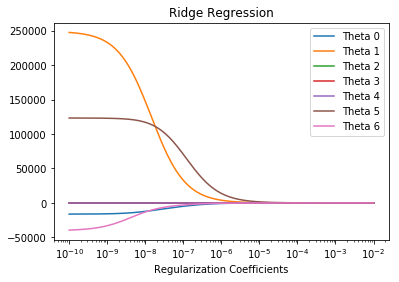

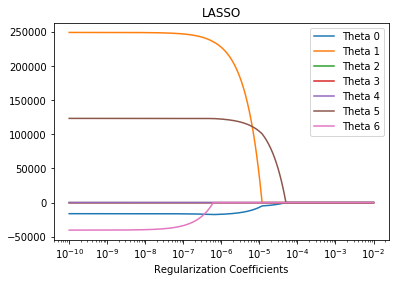

In [273]:
# fp = 'Real estate valuation data set.xlsx'
# rdata=pd.read_excel(fp)
# data=rdata[rdata.columns[:-1]]
# norm_data = pd.DataFrame(preprocessing.normalize(data,norm = 'l2',axis=0),columns=list(data.columns))

train_X,test_X,train_Y,test_Y = train_test_split(reg_data[reg_data.columns[:-1]],Y,random_state=1000)

lam1=np.logspace(-10,-2,1000)
lam2=np.logspace(-10,-2,1000)
inter=[]
plt.gcf().clear()
for i in lam1:
    reg=Ridge(alpha=i)
    reg.fit(train_X,train_Y)
    if i==lam1[0]:
        coeff=reg.coef_
    else:
        coeff=np.vstack([coeff,reg.coef_])
    inter.append(reg.intercept_)
plt.semilogx(lam1,inter)
for j in range(len(coeff[0])):
    plt.semilogx(lam1,coeff[:,j])
# plt.ylim([-1000,1000])
plt.legend(['Theta 0','Theta 1','Theta 2','Theta 3','Theta 4','Theta 5','Theta 6'])
plt.title('Ridge Regression')
plt.xlabel('Regularization Coefficients')
plt.show()
inter=[]
for p in lam2:
    las=Lasso(alpha=p)
    las.fit(train_X,train_Y)
    if p==lam2[0]:
        coeff=las.coef_
    else:
        coeff=np.vstack([coeff,las.coef_])
    inter.append(las.intercept_)
plt.semilogx(lam2,inter)
for q in range(len(coeff[0])):
    plt.semilogx(lam2,coeff[:,q])
# plt.ylim([-1000,1000])
plt.legend(['Theta 0','Theta 1','Theta 2','Theta 3','Theta 4','Theta 5','Theta 6'])
plt.title('LASSO')
plt.xlabel('Regularization Coefficients')
plt.show()

# Q5(d)

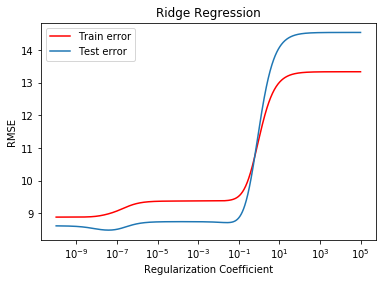

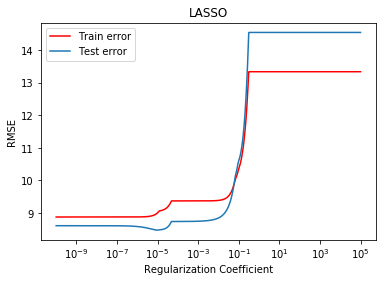

In [260]:
train_X,test_X,train_Y,test_Y = train_test_split(reg_data[reg_data.columns[:-1]],Y,random_state=1000,test_size=0.2)

lam1=np.logspace(-10,5,1000)
lam2=np.logspace(-10,5,1000)
plt.gcf().clear()
err_tr=[]
err_tst=[]
for i in lam1:
    reg=Ridge(alpha=i)
    reg.fit(train_X,train_Y)
    
    y_pred_tr=reg.predict(train_X)
    err_tr.append(math.sqrt(mean_squared_error(train_Y,y_pred_tr)))
    
    y_pred_tst=reg.predict(test_X)
    err_tst.append(math.sqrt(mean_squared_error(test_Y,y_pred_tst)))

plt.semilogx(lam1,err_tr,'r')
plt.legend(['Train error'])
plt.semilogx(lam1,err_tst)
plt.title('Ridge Regression')
plt.xlabel('Regularization Coefficient')
plt.ylabel('RMSE')
plt.legend(["Train error",'Test error'])
plt.show()

err_tr=[]
err_tst=[]
for i in lam2:
    las=Lasso(alpha=i)
    las.fit(train_X,train_Y)
    
    y_pred_tr=las.predict(train_X)
    err_tr.append(math.sqrt(mean_squared_error(train_Y,y_pred_tr)))
    
    y_pred_tst=las.predict(test_X)
    err_tst.append(math.sqrt(mean_squared_error(test_Y,y_pred_tst)))

plt.semilogx(lam2,err_tr,'r')
plt.legend(['Train error'])
plt.semilogx(lam2,err_tst)
plt.title('LASSO')
plt.xlabel('Regularization Coefficient')
plt.ylabel('RMSE')
plt.legend(["Train error",'Test error'])
plt.show()